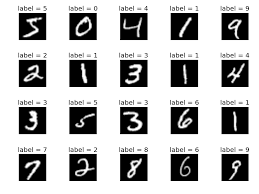

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

In [3]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X_train = X[:60000]
X_test  = X[60000:]

In [7]:
y_train = y[:60000]
y_test  = y[60000:]

In [8]:
model = MLPClassifier(hidden_layer_sizes=(50,) , max_iter=100 , alpha=1e-4,solver='sgd', random_state=1 
                      , learning_rate_init=.1 , verbose=10 , tol=1e-4)

In [9]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04081494
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [10]:
model.score(X_train, y_train)

1.0

In [11]:
model.score(X_test, y_test)

0.9731

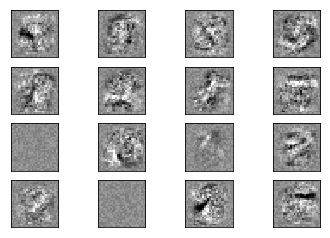

In [12]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin = model.coefs_[0].min()
vmax = model.coefs_[0].max()

for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray , vmin=.5 * vmin , vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())